Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Gasper Bizjan"

---

## Assignment 4 - Triangular Grid I
The aim of the assignment is to succesively create an algorithm for generation and visualization of triangular grids on a rectangular 2D domain. <br> 
The domain is given by $$\Omega = [x_{low},x_{high}] \times [y_{low},y_{high}]$$ and the user assigns numbers of grid points in each direction $N_x$ and $N_y$ to form an equidistant spacing.<br><br>
Datastructure: 
<ol>
    <li> $points$: each row is a point $P_i$,  the columns represent the $x$ and $y$ component of the point</li>   
    <li> $cells$: indices of the points that form a cell $T_j$ - the $3$ columns given by the index in the vertex of the triangular grid. </li>
</ol>
Please follow the exact numbering scheme for the vertices given in the tasks and the corresponding examples!

### 4.1 - Creation of a triangular grid
Write a function ```createTriGrid``` that creates a triangular grid as descripted in the lecture slides. make sure such that the cell numbering correspons to the lecture and as shown in example below. <br><br>
<b>INPUT:</b> $x_{low},x_{high},y_{low},y_{high}\in \mathbb{R}$ - the domain boundaries; $N_x,N_y\in\mathbb{N}$ - the number of points in each direction <br>
<b>OUTPUT:</b> $points,cells$ of a <b>triangular</b> grid<br> <br>
Example: $points$ and $cells$ for $\Omega = [0,1]^2$ and $N_x = N_y=3$, representing the mesh depicted in file <i>tri_grid.png</i>
$$ points = \begin{bmatrix} 
0.0 & 0.0 \\
0.5 & 0.0 \\
1.0 & 0.0 \\
0.0 & 0.5 \\
0.5 & 0.5 \\
1.0 & 0.5 \\
0.0 & 1.0 \\
0.5 & 1.0 \\
1.0 & 1.0 \end{bmatrix} \quad cells = \begin{bmatrix}
0 & 1 & 3 \\
4 & 3 & 1 \\
1 & 2 & 4 \\
5 & 4 & 2 \\
3 & 4 & 6 \\
7 & 6 & 4 \\
4 & 5 & 7 \\
8 & 7 & 5\end{bmatrix} $$

In [8]:
import numpy as np

# YOUR CODE HERE
def createTriGrid(x_low, x_high, y_low, y_high, Nx, Ny):
    '''
    createTriGrid generates a triangular grid for the domain  Ω=[𝑎,𝑏]x[c,d] with Nx and Ny grid-points in each direction.
    
    𝑎, 𝑏, c, d - domain boundaries,  
    𝑁x, Ny  - number of grid-points per direction
    '''   
    
    x = np.linspace(x_low, x_high, Nx) # 1D of the equidistant grid
    y = np.linspace(y_low, y_high, Ny) # 1D of the equidistant grid
    X, Y = np.meshgrid(x, y)  # 2D grid with matrix-representation NxN
    
    # Points
    points = np.zeros([Nx*Ny,2])
    points[:,0] = X.flatten()
    points[:,1] = Y.flatten()
    
    Ncells = 2*(Nx-1)*(Ny-1)
    cells = np.zeros([Ncells, 3])
     
    k = 0
    for n in range(int(Ncells)):  
        if np.mod(n,2*(Nx-1))==0 and k!=0:
            k+=1 # new row
        if n%2==0: # Bottom left triangles 
            cells[n,0] = k
            cells[n,1] = k+1
            cells[n,2] = Nx+k
            k+=1
        else: # Top right triangles     
            cells[n,0] = Nx+k
            cells[n,1] = Nx+k-1
            cells[n,2] = k
    
    cells = cells.astype(int)
    
    return points, cells

points,cells = createTriGrid(0,1,0,1,3,3)
print(points)
print()
print(cells)

[[0.  0. ]
 [0.5 0. ]
 [1.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [1.  0.5]
 [0.  1. ]
 [0.5 1. ]
 [1.  1. ]]

[[0 1 3]
 [4 3 1]
 [1 2 4]
 [5 4 2]
 [3 4 6]
 [7 6 4]
 [4 5 7]
 [8 7 5]]


In [9]:
points,cells = createTriGrid(0,1,0,1,10,10)

### 4.2 - Grid visualization
Write a function ```showGrid``` that visualizes all the points and edges of the grid, given by $points$ and $cells$. It is not necessary to annotate the points and triangles by text. 

<b>INPUT:</b> $points,cells$ - grid data as defined above

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# YOUR CODE HERE
plt.rcParams["figure.figsize"] = [14, 14] # Seting size

def showGrid(points, cells):
    '''
    showGrid generates a graphical object mesh  Ω=[𝑎,𝑏]x[c,d]  with  𝑁x and Ny  grid-points in each direction.
    
    points - x,y array of points
    cells - P1, P2 and P3 point of a cell array
    '''
    fig = plt.figure() # creating figure
    ax = fig.add_subplot(111)
    
    ax.scatter(points[:,0], points[:,1], s=35)
    
    for i in range(cells[:,0].size):
        element = np.array([points[cells[i,0]], points[cells[i,1]], points[cells[i,2]] ])
        p = plt.Polygon(element, facecolor='none', edgecolor='orange', linewidth=0.8)
        plt.gca().add_patch(p)
    
    # numbering points
    annotations_points = np.array([])
    for i in range(points[:,0].size):
        annotations_points = np.append(annotations_points, 'P'+str(i))
    for i, label in enumerate(annotations_points):
        ax.annotate(label, (points[i,0], points[i,1]))
    
    # numbering elements
    annotations_ele = np.array([])
    for i in range(cells[:,0].size):
        annotations_ele = np.append(annotations_ele, 'T'+str(i))
    for i, label in enumerate(annotations_ele):
        p1, p2, p3 = points[cells[i,0]], points[cells[i,1]], points[cells[i,2]]
        ax.annotate(label, ((p1[0]+p2[0]+p3[0])/3, (p1[1]+p2[1]+p3[1])/3))
        
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    plt.show() 

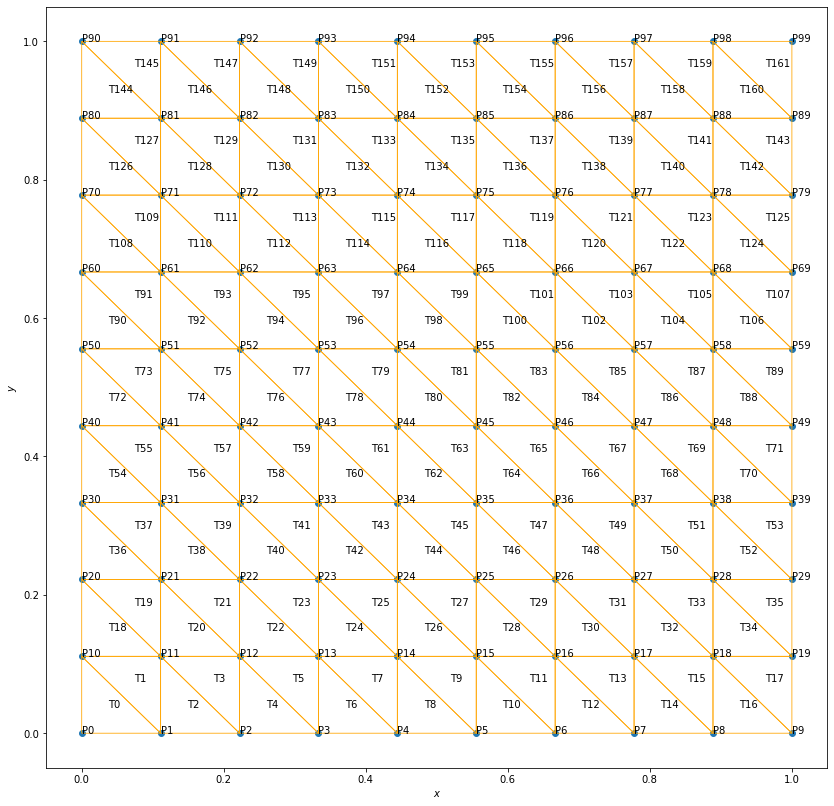

In [11]:
# show the grid generated above
showGrid(points,cells)

In [12]:
### BEGIN HIDDEN TEST
assert True
### END HIDDEN TEST